# Description

This notebook contains the interpretation of a cluster (which features/latent variables in the original data are useful to distinguish traits in the cluster).

See section [LV analysis](#lv_analysis) below

# Modules loading

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
import re
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# from IPython.display import HTML
from tqdm import tqdm

from clustering.methods import ClusterInterpreter
from data.recount2 import LVAnalysis
from data.cache import read_data
import conf

# Settings

In [3]:
# PARTITION_K = 26
# PARTITION_CLUSTER_ID = 18

# Load MultiPLIER summary

In [4]:
multiplier_model_summary = read_data(conf.MULTIPLIER["MODEL_SUMMARY_FILE"])

In [5]:
multiplier_model_summary.shape

(2157, 5)

In [6]:
multiplier_model_summary.head()

,pathway,LV index,AUC,p-value,FDR
1,KEGG_LYSINE_DEGRADATION,1,0.388059,0.866078,0.956005
2,REACTOME_MRNA_SPLICING,1,0.733057,0.000048,0.000582
3,MIPS_NOP56P_ASSOCIATED_PRE_RRNA_COMPLEX,1,0.680555,0.001628,0.011366
4,KEGG_DNA_REPLICATION,1,0.549473,0.312155,0.539951
5,PID_MYC_ACTIVPATHWAY,1,0.639303,0.021702,0.083739


# Load data

## Original data

In [7]:
INPUT_SUBSET = "z_score_std"

In [8]:
INPUT_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [9]:
input_filepath = Path(
    conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
    INPUT_SUBSET,
    f"{INPUT_SUBSET}-{INPUT_STEM}.pkl",
).resolve()
display(input_filepath)

assert input_filepath.exists(), "Input file does not exist"

input_filepath_stem = input_filepath.stem
display(input_filepath_stem)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/data_transformations/z_score_std/z_score_std-projection-smultixcan-efo_partial-mashr-zscores.pkl')

'z_score_std-projection-smultixcan-efo_partial-mashr-zscores'

In [10]:
data = pd.read_pickle(input_filepath)

In [11]:
data.shape

(3752, 987)

In [12]:
data.head()

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,...,LV978,LV979,LV980,LV981,LV982,LV983,LV984,LV985,LV986,LV987
100001_raw-Food_weight,-0.695006,1.962565,0.057683,0.878731,-0.539977,1.481272,-0.396422,1.090180,0.759223,0.931395,...,1.129784,1.752343,-1.411403,2.823863,0.931116,-1.054519,0.432982,-0.633597,0.554279,-0.642479
100002_raw-Energy,-1.528127,-0.345309,-0.148953,-0.242060,0.373427,0.791092,0.263477,0.987702,0.354391,1.416059,...,0.224604,0.769882,-0.509482,0.091153,2.286789,-1.008256,-0.029764,1.737229,-0.272107,-0.526125
100003_raw-Protein,-0.704572,-1.011299,0.671420,0.143991,0.615212,0.874212,-0.040998,0.915170,0.254369,-0.084237,...,1.003019,1.044314,-2.376108,0.004778,0.053714,-0.892447,-0.183800,1.377991,-0.278794,-0.419733
100004_raw-Fat,-0.989832,-1.875490,0.261555,-1.420719,0.366238,1.167049,0.257387,0.717674,-0.997664,0.969825,...,0.585913,0.638314,0.119139,-0.140204,1.394326,-1.173402,0.555058,1.013982,-0.544506,-0.064061
100005_raw-Carbohydrate,-0.580143,0.243335,0.158966,-0.036558,0.068176,-0.202639,1.101281,0.675227,1.463432,1.010078,...,-0.249108,-0.026814,0.232713,0.323682,1.168642,-0.282935,0.653105,1.909526,0.199997,-1.656894


## Clustering partitions

In [13]:
# CONSENSUS_CLUSTERING_DIR = Path(
#     conf.RESULTS["CLUSTERING_DIR"], "consensus_clustering"
# ).resolve()

# display(CONSENSUS_CLUSTERING_DIR)

In [14]:
# input_file = Path(CONSENSUS_CLUSTERING_DIR, "best_partitions_by_k.pkl").resolve()
# display(input_file)

In [15]:
# best_partitions = pd.read_pickle(input_file)

In [16]:
# best_partitions.shape

In [17]:
# best_partitions.head()

# Functions

In [18]:
# def show_cluster_stats(data, partition, cluster):
#     cluster_traits = data[partition == cluster].index
#     display(f"Cluster '{cluster}' has {len(cluster_traits)} traits")
#     display(cluster_traits)

# LV analysis
<a id="lv_analysis"></a>

## Associated traits

In [19]:
# display(best_partitions.loc[PARTITION_K])
# part = best_partitions.loc[PARTITION_K, "partition"]

In [20]:
# show_cluster_stats(data, part, PARTITION_CLUSTER_ID)

## Associated latent variables

In [21]:
# ci = ClusterInterpreter(
#     threshold=1.0,
#     max_features=20,
#     max_features_to_explore=100,
# )

In [22]:
# ci.fit(data, part, PARTITION_CLUSTER_ID)

In [23]:
# ci.features_

In [24]:
# # save interpreter instance
# output_dir = Path(
#     conf.RESULTS["CLUSTERING_INTERPRETATION"]["BASE_DIR"],
#     "cluster_lvs",
#     f"part{PARTITION_K}",
# )
# output_dir.mkdir(exist_ok=True, parents=True)

In [25]:
# output_file = Path(
#     output_dir, f"cluster_interpreter-part{PARTITION_K}_k{PARTITION_CLUSTER_ID}.pkl"
# )
# display(output_file)

In [26]:
# ci.features_.to_pickle(output_file)

## Top attributes

In [27]:
# lvs_list = "LV116,LV931,LV744,LV697,LV885,LV536,LV550,LV220,LV272,LV739,LV678,LV470,LV66,LV189,LV517,LV840,LV246,LV502,LV525,LV85".split(",")

In [28]:
lvs_list = pd.read_pickle("/tmp/lv_list.pkl").index.tolist()

In [29]:
len(lvs_list)

485

In [30]:
lvs_list[:10]

['LV116',
 'LV931',
 'LV744',
 'LV697',
 'LV885',
 'LV536',
 'LV550',
 'LV220',
 'LV272',
 'LV739']

In [31]:
def _my_func(x):
    _cols = [c for c in x.index if not c.startswith("LV")]
    _tmp = x[_cols].dropna()
    if _tmp.shape[0] > 0:
        return _tmp.iloc[0]

    return None

In [32]:
cell_type_dfs = []
tissue_dfs = []

pbar = tqdm(lvs_list[:50])
for lv_name in pbar:
    pbar.set_description(lv_name)

    #     lv_name = lv_info["name"]
    lv_obj = LVAnalysis(lv_name, data)

    #     # show lv prior knowledge match (pathways)
    #     lv_pathways = multiplier_model_summary[
    #         multiplier_model_summary["LV index"].isin((lv_name[2:],))
    #         & (
    #             (multiplier_model_summary["FDR"] < 0.05)
    #             | (multiplier_model_summary["AUC"] >= 0.75)
    #         )
    #     ]
    #     display(lv_pathways)

    lv_data = lv_obj.get_experiments_data()

    #     display("")
    #     display(lv_obj.lv_traits.head(20))
    #     display("")
    #     display(lv_obj.lv_genes.head(10))

    # get cell type attributes
    #     lv_attrs = lv_obj.get_attributes_variation_score()
    lv_attrs = pd.Series(lv_data.columns.tolist())
    lv_attrs = lv_attrs[
        lv_attrs.str.match(
            "(?:cell[^\w]*type$)",
            case=False,
            flags=re.IGNORECASE,
        ).values
    ].sort_values(ascending=False)
    display(lv_attrs)

    lv_attrs_data = lv_data[lv_attrs.tolist() + [lv_name]]
    lv_attrs_data = lv_attrs_data.assign(attr=lv_attrs_data.apply(_my_func, axis=1))
    lv_attrs_data = lv_attrs_data.drop(columns=lv_attrs.tolist())
    lv_attrs_data = lv_attrs_data.dropna().sort_values(lv_name, ascending=False)
    lv_attrs_data = lv_attrs_data.rename(columns={lv_name: "lv"})
    cell_type_dfs.append(lv_attrs_data)

    # get tissue attributes
    lv_attrs = pd.Series(lv_data.columns.tolist())
    lv_attrs = lv_attrs[
        lv_attrs.str.match(
            "(?:tissue$)|(?:tissue[^\w]*type$)",
            case=False,
            flags=re.IGNORECASE,
        ).values
    ].sort_values(ascending=False)
    display(lv_attrs)

    lv_attrs_data = lv_data[lv_attrs.tolist() + [lv_name]]
    lv_attrs_data = lv_attrs_data.assign(attr=lv_attrs_data.apply(_my_func, axis=1))
    lv_attrs_data = lv_attrs_data.drop(columns=lv_attrs.tolist())
    lv_attrs_data = lv_attrs_data.dropna().sort_values(lv_name, ascending=False)
    lv_attrs_data = lv_attrs_data.rename(columns={lv_name: "lv"})
    tissue_dfs.append(lv_attrs_data)

LV116:   0%|          | 0/50 [00:00<?, ?it/s]

SRP059039, SRP045500, SRP063059, SRP045569, SRP015670, SRP059531, SRP062958, SRP039361, SRP056733, SRP060370, SRP062966, SRP045352, SRP048804, SRP032775, SRP059172, SRP050246, SRP064458, SRP033711, SRP049820, SRP023199, SRP060416, SRP005279, SRP042161, SRP059701, SRP068139, SRP051848, SRP014428, SRP063661, SRP057205, SRP041826, SRP059057, SRP064259, SRP046226, SRP044956, SRP066356, SRP048640, SRP041885, SRP045659, SRP041647, SRP045565, SRP041620, SRP053186, SRP045441, SRP022133, SRP055874, SRP029990, SRP044206, SRP065763, SRP056443, SRP041538, SRP044593, SRP019270, SRP067934, SRP059035, SRP019936, SRP054971, SRP058237, SRP051368, SRP019758, 

8      celltype
21    cell type
dtype: object

79    tissue type
4          tissue
dtype: object

LV931:   2%|▏         | 1/50 [00:12<10:21, 12.68s/it]

SRP056295, SRP017138, SRP043080, SRP048759, SRP021191, SRP028594, SRP056197, SRP050272, SRP059735, SRP028554, SRP061932, SRP033266, SRP005279, SRP055390, SRP050493, SRP046233, SRP035679, SRP043033, SRP041885, SRP027358, SRP045500, SRP045352, SRP015360, SRP053046, 

30     celltype
1     cell type
dtype: object

0    tissue
dtype: object

LV744:   4%|▍         | 2/50 [00:18<08:29, 10.62s/it]

SRP033135, SRP002326, SRP042161, SRP066834, SRP055569, SRP060416, SRP020646, SRP013363, SRP050499, SRP057196, SRP012461, SRP013935, SRP059379, SRP062177, SRP007338, SRP003901, SRP033248, SRP028902, SRP014688, SRP057205, SRP011422, SRP040278, SRP050992, SRP055153, SRP002184, SRP042218, SRP053246, SRP007461, SRP009276, SRP007947, SRP036821, SRP058351, SRP018716, SRP043085, SRP019994, SRP059035, SRP006575, SRP010350, SRP007596, SRP026537, SRP002487, SRP015819, SRP012056, SRP064464, SRP039348, SRP008218, SRP021072, SRP028170, SRP018525, SRP041718, SRP052706, SRP037719, SRP042297, SRP059057, SRP010907, SRP041036, SRP059775, SRP063840, SRP016568, SRP051599, SRP044766, SRP006474, SRP036053, SRP007525, SRP018838, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (64 != 65)
  warnings.warn(


0    cell type
dtype: object

7    tissue
dtype: object

LV697:   6%|▌         | 3/50 [00:36<10:02, 12.82s/it]

SRP051083, SRP048700, SRP055569, SRP043960, SRP041846, SRP057196, SRP055153, SRP051595, SRP044668, SRP042161, SRP060416, SRP013935, SRP062332, SRP061425, SRP066363, SRP033135, SRP031459, SRP051485, SRP038963, SRP044013, SRP059035, SRP051606, SRP004637, SRP064259, SRP006912, SRP045421, SRP050440, SRP056153, SRP056530, SRP040692, SRP066956, SRP009247, SRP019240, SRP028902, SRP056498, SRP063493, SRP060708, SRP059379, SRP007461, SRP017411, SRP060370, SRP051544, SRP066834, SRP041956, SRP063840, SRP032456, SRP042184, SRP007498, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (47 != 48)
  warnings.warn(


7    cell type
dtype: object

13    tissue type
9          tissue
dtype: object

LV885:   8%|▊         | 4/50 [00:48<09:41, 12.63s/it]

SRP058667, SRP060355, SRP007338, SRP024268, SRP036848, SRP035387, SRP045276, SRP019807, SRP007508, SRP029889, SRP028336, SRP058626, SRP015640, SRP057248, SRP064464, SRP057196, SRP049097, SRP063840, SRP009123, SRP055569, SRP050551, SRP050499, SRP014635, SRP059950, SRP064259, SRP009862, SRP042161, SRP064454, SRP066834, SRP049333, SRP052950, SRP060416, SRP044917, SRP051249, SRP007498, SRP003901, SRP051485, SRP030401, SRP007881, SRP029603, SRP040998, SRP011578, SRP019810, SRP050003, SRP009247, SRP026620, SRP033135, SRP051472, SRP066956, SRP029262, SRP051705, SRP061701, SRP012167, SRP057244, SRP026454, SRP040442, SRP041377, SRP051822, SRP059035, SRP055438, SRP016583, SRP006575, SRP057586, SRP014027, SRP042620, SRP015668, SRP010279, SRP014213, SRP056696, SRP027364, SRP037982, SRP001997, SRP051825, SRP057205, SRP007412, SRP052057, SRP058722, SRP018853, SRP016140, SRP059775, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (78 != 80)
  warnings.warn(


24    cell type
dtype: object

0    tissue type
3         tissue
dtype: object

LV536:  10%|█         | 5/50 [01:05<10:28, 13.97s/it]

SRP007947, SRP003901, SRP055569, SRP037722, SRP008218, SRP066834, SRP015013, SRP060416, SRP019994, SRP057196, SRP042161, SRP058773, SRP012557, SRP050499, SRP055153, SRP059379, SRP030617, SRP005279, SRP051606, SRP003754, SRP058841, SRP009247, SRP050497, SRP018104, SRP007508, SRP008145, SRP041377, SRP002326, SRP035478, SRP033135, SRP017777, SRP055440, SRP057248, SRP000599, SRP013450, SRP014213, SRP055513, SRP042218, SRP034543, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (37 != 39)
  warnings.warn(


0    cell type
dtype: object

3    tissue
dtype: object

LV550:  12%|█▏        | 6/50 [01:17<09:51, 13.43s/it]

SRP055569, SRP033135, SRP051606, SRP009247, SRP057196, SRP066834, SRP060416, SRP012557, SRP049097, SRP019994, SRP042161, SRP017933, SRP065559, SRP058773, SRP007498, SRP012461, SRP050497, SRP019807, SRP041396, SRP019936, SRP030617, SRP055438, SRP050499, SRP045352, SRP042620, SRP055153, SRP055810, SRP051825, SRP064464, SRP018853, SRP055392, SRP002184, SRP009266, SRP063840, SRP006474, SRP015845, SRP026315, SRP059733, SRP048820, SRP036848, SRP059035, SRP034007, SRP015013, SRP011578, SRP058667, SRP009862, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (43 != 46)
  warnings.warn(


0    cell type
dtype: object

17    tissue type
10         tissue
dtype: object

LV220:  14%|█▍        | 7/50 [01:33<10:01, 13.99s/it]

SRP042161, SRP060416, SRP050499, SRP055569, SRP033135, SRP066834, SRP059379, SRP057196, SRP009266, SRP003901, SRP018838, SRP055153, SRP011546, SRP064464, SRP063840, SRP059775, SRP015449, SRP050992, SRP059035, SRP049238, SRP047192, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (20 != 21)
  warnings.warn(


1    cell type
dtype: object

14    tissue
dtype: object

LV272:  16%|█▌        | 8/50 [01:45<09:27, 13.51s/it]

SRP055569, SRP042161, SRP006474, SRP033135, SRP017575, SRP036821, SRP006575, SRP057196, SRP009266, SRP050499, SRP066834, SRP065202, SRP019994, SRP060416, SRP047192, SRP005279, SRP059775, SRP049097, SRP059379, SRP058773, SRP007359, SRP061241, SRP012461, SRP009862, SRP042620, SRP049713, SRP014620, SRP057745, SRP003754, SRP033369, SRP033276, SRP014428, SRP027383, SRP049238, SRP045322, SRP062230, SRP024268, SRP058841, SRP018838, SRP002915, SRP055810, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (38 != 41)
  warnings.warn(


0    cell type
dtype: object

33    tissue type
12         tissue
dtype: object

LV739:  18%|█▊        | 9/50 [01:59<09:19, 13.64s/it]

SRP042161, SRP066834, SRP059379, SRP009862, SRP057196, SRP062025, SRP063840, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (6 != 7)
  warnings.warn(


1    cell type
dtype: object

5    tissue
dtype: object

LV678:  20%|██        | 10/50 [02:05<07:30, 11.27s/it]

SRP011924, SRP066729, SRP055569, SRP052978, SRP029889, SRP026315, SRP042161, SRP017933, SRP009266, SRP033135, SRP009862, SRP014428, SRP006475, SRP055810, SRP062177, SRP034712, SRP028301, SRP044206, SRP012056, SRP057196, SRP057118, SRP045573, SRP024268, SRP018838, SRP060416, SRP018719, SRP061888, SRP058840, SRP002915, SRP059775, SRP014867, SRP033276, SRP029899, SRP021478, SRP049500, SRP036821, SRP055513, SRP058773, SRP045666, SRP041706, SRP011185, SRP006575, SRP028336, SRP043368, SRP012461, SRP058740, SRP007947, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (45 != 47)
  warnings.warn(


2    cell type
dtype: object

0    tissue
dtype: object

LV470:  22%|██▏       | 11/50 [02:17<07:34, 11.67s/it]

SRP024268, SRP007947, SRP064464, SRP057196, SRP066834, SRP055569, SRP060416, SRP007412, SRP041036, SRP029889, SRP042161, SRP058667, SRP039361, SRP060355, SRP007338, SRP045276, SRP015976, SRP028336, SRP056696, SRP042620, SRP014428, SRP055513, SRP063840, SRP006575, SRP050499, SRP012015, SRP061701, SRP045569, SRP033135, SRP047192, SRP059066, SRP063834, SRP058773, SRP037982, SRP064259, SRP017138, SRP059379, SRP041826, SRP050003, SRP020493, SRP050551, SRP010483, SRP012461, SRP035387, SRP039694, SRP001558, SRP009247, SRP011924, SRP066956, SRP040998, SRP056098, SRP052740, SRP058626, SRP034712, SRP062873, SRP004837, SRP025982, SRP042218, SRP051688, SRP063661, SRP049591, SRP009373, SRP003901, SRP043960, SRP045898, SRP056395, SRP030617, SRP007461, SRP066356, SRP051485, SRP045659, SRP011546, SRP050992, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (71 != 73)
  warnings.warn(


4    cell type
dtype: object

24    tissue type
0          tissue
dtype: object

LV66:  24%|██▍       | 12/50 [02:41<09:40, 15.27s/it] 

SRP048674, SRP029207, SRP021912, SRP051249, SRP040292, SRP055513, SRP055569, SRP057196, SRP050499, SRP017959, SRP029334, SRP045364, SRP043434, SRP049981, SRP042161, SRP008218, SRP020646, SRP011895, SRP012461, SRP021193, SRP012656, SRP026052, SRP050954, SRP037982, SRP049946, SRP027383, SRP022259, SRP049409, SRP056696, SRP018933, SRP002915, SRP033135, SRP009123, SRP058804, SRP043221, SRP066834, SRP050193, SRP048759, SRP047192, SRP050551, SRP008145, SRP060416, SRP044610, SRP050992, SRP004637, SRP044668, SRP057205, SRP058773, SRP042218, SRP016059, SRP058740, SRP040300, SRP020493, SRP039694, SRP040998, SRP058375, SRP056146, SRP010054, SRP039591, SRP019994, SRP014790, SRP014213, SRP007338, SRP029262, SRP014809, SRP018403, SRP041538, SRP063834, SRP034592, SRP018838, SRP007494, SRP050374, SRP002326, SRP007481, SRP030617, SRP026620, SRP052879, SRP015013, SRP033351, SRP058626, SRP061566, SRP039338, SRP017435, SRP044042, SRP015853, SRP007461, SRP007498, SRP003726, SRP066371, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (86 != 89)
  warnings.warn(


1    cell type
dtype: object

38    tissue type
2          tissue
dtype: object

LV189:  26%|██▌       | 13/50 [02:59<09:57, 16.14s/it]

SRP037775, SRP064259, SRP033250, SRP026537, SRP045322, SRP042620, SRP042161, SRP055569, SRP049500, SRP006575, SRP030475, SRP011974, SRP049507, SRP030401, SRP043470, SRP057205, SRP061241, SRP055512, SRP059379, SRP058722, SRP063620, SRP049988, SRP019498, SRP060416, SRP057196, SRP065202, SRP033135, SRP018853, SRP011054, SRP019936, SRP013389, SRP063840, SRP066834, SRP032789, SRP048664, SRP040966, SRP047192, SRP061243, SRP004637, SRP012557, SRP040418, SRP023262, SRP044610, SRP058571, SRP055153, SRP051102, SRP031503, SRP058773, SRP012167, SRP043320, SRP035988, SRP067214, SRP049713, SRP040505, SRP050971, SRP057758, SRP013239, SRP029334, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (56 != 58)
  warnings.warn(


2    cell type
dtype: object

51    tissue type
8          tissue
dtype: object

LV517:  28%|██▊       | 14/50 [03:13<09:16, 15.47s/it]

SRP055569, SRP057196, SRP015449, SRP002326, SRP042161, SRP060416, SRP033206, SRP030401, SRP025989, SRP050892, SRP040421, SRP012461, SRP064259, SRP050499, SRP009266, SRP018104, SRP005279, SRP066834, SRP006970, SRP057205, SRP029889, SRP019994, SRP018020, SRP043960, SRP009862, SRP017199, SRP058773, SRP014624, SRP018838, SRP015976, SRP060359, SRP014867, SRP033119, SRP059775, SRP014320, SRP063840, SRP041788, SRP056696, SRP017575, SRP018719, SRP027345, SRP017933, SRP046266, SRP030617, SRP015670, SRP015013, SRP044206, SRP017190, SRP055863, SRP011422, SRP007338, SRP015678, SRP045639, SRP006575, SRP028325, SRP033135, SRP059039, SRP004837, SRP059732, SRP062389, SRP059379, SRP014428, SRP002605, SRP023262, SRP027258, SRP036821, SRP010038, SRP038964, SRP041162, SRP014027, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (67 != 70)
  warnings.warn(


0    cell type
dtype: object

1    tissue
dtype: object

LV840:  30%|███       | 15/50 [03:30<09:11, 15.76s/it]

SRP043417, SRP028301, SRP059775, SRP062177, SRP012056, SRP033119, SRP040278, SRP058300, SRP034543, SRP056084, SRP038695, SRP058841, SRP059948, SRP042161, SRP009266, SRP006475, SRP045501, SRP033369, SRP058773, SRP018861, SRP041036, SRP055810, SRP055569, SRP029245, SRP018719, SRP015964, SRP014867, SRP010280, SRP048536, SRP002605, SRP053402, SRP063339, SRP019250, SRP007461, SRP044653, SRP046749, SRP039397, SRP052950, SRP056036, SRP043962, SRP061539, SRP019989, SRP064481, SRP045481, SRP028887, SRP013725, SRP009861, SRP041263, SRP058087, SRP019241, SRP050055, SRP011546, SRP039348, SRP010430, SRP058191, SRP049510, SRP056200, SRP060637, SRP021214, SRP060416, SRP041656, SRP064464, SRP041396, SRP053052, SRP029515, SRP064317, SRP001349, SRP041130, SRP017644, SRP059266, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (68 != 70)
  warnings.warn(


2    cell type
dtype: object

52    tissue
dtype: object

LV246:  32%|███▏      | 16/50 [03:39<07:55, 13.97s/it]

SRP042186, SRP045545, SRP044756, SRP051211, SRP042620, SRP055749, SRP029899, SRP021478, SRP042086, SRP065812, SRP007412, SRP020470, SRP037778, SRP042161, SRP029889, SRP057196, SRP053101, SRP050499, SRP035988, SRP033135, SRP034712, SRP012461, SRP056041, SRP048674, SRP059643, SRP045364, SRP026042, SRP050971, SRP051705, SRP035387, SRP055512, SRP007461, SRP065451, SRP007338, SRP019936, SRP055569, SRP060355, SRP058571, SRP041377, SRP040998, SRP059379, SRP036133, SRP066834, SRP051772, SRP044056, SRP048669, SRP059066, SRP068078, SRP060359, SRP055475, SRP058771, SRP045639, SRP043085, SRP062177, SRP064464, SRP041597, SRP056696, SRP059035, SRP010678, SRP049593, SRP048536, SRP061566, SRP030617, SRP057804, SRP045156, SRP044171, SRP010644, SRP057448, SRP041751, SRP061701, SRP033131, SRP041387, SRP063834, SRP020493, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (72 != 74)
  warnings.warn(


0    cell type
dtype: object

17    tissue type
10         tissue
dtype: object

LV502:  34%|███▍      | 17/50 [03:57<08:18, 15.11s/it]

SRP012461, SRP055569, SRP042161, SRP060416, SRP042218, SRP014624, SRP057196, SRP015678, SRP015449, SRP011054, SRP031776, SRP033369, SRP066834, SRP011578, SRP057205, SRP059170, SRP025982, SRP002915, SRP057248, SRP011546, SRP055810, SRP050179, SRP033135, SRP056696, SRP029334, SRP058773, SRP067529, SRP063620, SRP041718, SRP050499, SRP005279, SRP041094, SRP013984, SRP002640, SRP058120, SRP019994, SRP059531, SRP003754, SRP035391, SRP042184, SRP040243, SRP018716, SRP048674, SRP051000, SRP007461, SRP063840, SRP017575, SRP026537, SRP057500, SRP047192, SRP030617, SRP008554, SRP064259, SRP030475, SRP014867, SRP039348, SRP044206, SRP010038, SRP059035, SRP059732, SRP019936, SRP037982, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (59 != 62)
  warnings.warn(


0    cell type
dtype: object

99    tissue type
11         tissue
dtype: object

LV525:  36%|███▌      | 18/50 [04:24<09:52, 18.53s/it]

SRP055569, SRP042161, SRP033135, SRP050499, SRP058773, SRP060416, SRP059775, SRP009266, SRP057196, SRP066834, SRP055153, SRP056696, SRP018838, SRP009862, SRP019994, SRP017575, SRP012461, SRP064464, SRP063840, SRP050551, SRP019936, SRP002326, SRP013402, SRP045573, SRP013363, SRP025982, SRP007338, SRP058626, SRP057205, SRP014428, SRP044917, SRP062177, SRP059035, SRP064259, SRP059379, SRP036053, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (34 != 36)
  warnings.warn(


0    cell type
dtype: object

38    tissue type
15         tissue
dtype: object

LV85:  38%|███▊      | 19/50 [04:47<10:23, 20.12s/it] 

SRP012461, SRP055569, SRP057196, SRP023111, SRP066834, SRP058773, SRP002184, SRP042161, SRP009266, SRP015976, SRP033135, SRP007947, SRP064464, SRP063840, SRP003901, SRP055153, SRP060416, SRP050499, SRP057205, SRP009247, SRP024268, SRP044956, SRP014542, SRP059379, SRP059035, SRP013239, SRP010350, SRP015853, SRP017411, SRP015449, SRP009862, SRP018256, SRP055810, SRP011546, SRP027383, SRP006575, SRP014620, SRP003227, SRP041130, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (37 != 39)
  warnings.warn(


0    cell type
dtype: object

44    tissue type
5          tissue
dtype: object

LV926:  40%|████      | 20/50 [05:03<09:23, 18.78s/it]

SRP042161, SRP055569, SRP066834, SRP012461, SRP060416, SRP055153, SRP057196, SRP058773, SRP033135, SRP050499, SRP059379, SRP042218, SRP003901, SRP009266, SRP063840, SRP018838, SRP059775, SRP014620, SRP064464, SRP058667, SRP050992, SRP047192, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (21 != 22)
  warnings.warn(


1    cell type
dtype: object

38    tissue type
5          tissue
dtype: object

LV824:  42%|████▏     | 21/50 [05:24<09:20, 19.32s/it]

SRP057205, SRP055569, SRP060416, SRP042161, SRP057196, SRP066834, SRP007498, SRP050499, SRP007947, SRP033135, SRP024268, SRP031507, SRP059379, SRP064464, SRP058773, SRP030617, SRP009862, SRP049340, SRP058351, SRP018719, SRP008218, SRP042119, SRP059279, SRP040145, SRP003726, SRP030475, SRP050992, SRP049391, SRP050147, SRP045294, SRP005129, SRP056076, SRP064259, SRP004847, SRP026537, SRP019241, SRP051472, SRP041263, SRP063867, SRP044611, SRP031858, SRP041008, SRP032928, SRP026033, SRP011378, SRP003021, SRP014320, SRP049475, SRP061840, SRP050365, SRP011546, SRP014626, SRP056084, SRP049593, SRP018861, SRP026084, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (54 != 56)
  warnings.warn(


5    cell type
dtype: object

10    tissue
dtype: object

LV496:  44%|████▍     | 22/50 [05:45<09:15, 19.85s/it]

SRP055569, SRP060416, SRP057196, SRP042218, SRP042161, SRP066834, SRP050499, SRP042620, SRP024268, SRP026537, SRP033135, SRP007947, SRP058773, SRP058351, SRP010129, SRP063493, SRP019222, SRP015449, SRP064259, SRP055153, SRP018838, SRP009247, SRP063840, SRP043960, SRP050992, SRP006474, SRP002184, SRP002079, SRP059379, SRP018837, SRP007498, SRP041826, SRP014670, SRP012461, SRP019758, SRP059170, SRP059775, SRP030617, SRP060370, SRP008218, SRP057205, SRP015360, SRP022591, SRP009862, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (43 != 44)
  warnings.warn(


0    cell type
dtype: object

3    tissue
dtype: object

LV545:  46%|████▌     | 23/50 [06:01<08:29, 18.88s/it]

SRP055569, SRP057196, SRP066834, SRP007359, SRP007947, SRP042161, SRP012461, SRP050499, SRP063840, SRP060416, SRP015013, SRP010350, SRP059379, SRP011546, SRP033135, SRP000599, SRP058773, SRP011054, SRP012096, SRP064464, SRP018838, SRP029889, SRP030617, SRP063661, SRP031507, SRP042218, SRP009247, SRP057205, 

0    cell type
dtype: object

1    tissue
dtype: object

LV541:  48%|████▊     | 24/50 [06:14<07:24, 17.08s/it]

SRP055569, SRP010350, SRP050499, SRP057196, SRP018837, SRP058773, SRP015668, SRP066834, SRP014428, SRP051765, SRP060416, SRP042161, SRP022892, SRP045711, SRP022260, SRP033135, SRP055474, SRP019994, SRP022591, SRP009266, SRP030401, SRP012461, SRP051606, SRP049068, SRP065559, SRP048577, SRP009029, SRP011185, SRP014867, SRP064735, SRP017435, SRP002487, SRP030617, SRP042218, SRP058120, SRP018853, SRP064464, SRP007338, SRP055153, SRP059732, SRP025982, SRP057205, SRP029207, SRP018838, SRP022259, SRP019936, SRP017575, SRP012557, SRP041008, SRP063840, SRP064454, SRP043085, SRP006475, SRP034599, SRP014213, SRP029656, SRP032789, SRP052874, SRP018719, SRP033511, SRP036053, SRP019207, SRP057616, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (61 != 63)
  warnings.warn(


0    cell type
dtype: object

89    tissue type
6          tissue
dtype: object

LV143:  50%|█████     | 25/50 [06:37<07:49, 18.78s/it]

SRP055569, SRP012546, SRP033135, SRP057196, SRP066834, SRP057205, SRP056957, SRP010279, SRP060416, SRP042161, SRP059775, SRP055153, SRP058773, SRP007947, SRP057248, SRP063840, SRP047192, SRP007461, SRP015449, SRP034528, SRP050499, SRP004637, SRP009247, SRP014320, SRP020470, SRP045659, SRP059379, SRP007359, SRP059035, SRP064464, SRP027258, SRP007946, SRP014624, SRP012461, SRP038761, SRP002184, SRP015640, SRP021509, SRP043593, SRP062025, SRP039361, SRP019936, SRP006474, SRP032775, SRP050992, SRP009862, SRP029739, SRP018933, SRP024268, SRP010644, SRP015670, SRP044042, SRP055810, SRP017138, SRP036821, SRP043085, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (53 != 56)
  warnings.warn(


0    cell type
dtype: object

78    tissue type
3          tissue
dtype: object

LV221:  52%|█████▏    | 26/50 [06:53<07:14, 18.09s/it]

SRP024244, SRP055569, SRP060416, SRP042161, SRP042218, SRP007947, SRP008145, SRP033135, SRP050499, SRP024268, SRP055675, SRP066834, SRP007338, SRP007569, SRP057196, SRP059057, SRP009247, SRP012461, SRP037735, SRP006574, SRP017123, SRP051736, SRP019994, SRP034953, SRP015668, SRP058773, SRP002915, SRP017575, SRP057205, SRP038969, SRP064464, SRP037722, SRP056733, SRP011054, SRP030617, SRP006575, SRP018838, SRP037719, SRP011422, SRP045659, SRP055474, SRP033498, SRP056098, SRP005279, SRP009251, SRP055513, SRP006474, SRP058120, SRP008218, SRP009067, SRP055810, SRP047476, SRP002881, SRP002326, SRP042228, SRP048801, SRP036821, 

0    cell type
dtype: object

9    tissue
dtype: object

LV122:  54%|█████▍    | 27/50 [07:14<07:13, 18.85s/it]

SRP010350, SRP049591, SRP007596, SRP057196, SRP028282, SRP060416, SRP055569, SRP035387, SRP040679, SRP004637, SRP013473, SRP065202, SRP009276, SRP015449, SRP010054, SRP006719, SRP034953, SRP009266, SRP066834, SRP019936, SRP058120, SRP014809, SRP059775, SRP051102, SRP045869, SRP036821, SRP006575, SRP017631, SRP060708, SRP040966, SRP023262, SRP013725, SRP061241, SRP044956, SRP029334, SRP027258, SRP019994, SRP042620, SRP052950, SRP058300, SRP017411, SRP064481, SRP026315, SRP022920, SRP012461, SRP014146, SRP056696, SRP050365, SRP060359, SRP033276, SRP033119, SRP067214, SRP036053, SRP033135, SRP042161, SRP050499, SRP061566, SRP055153, SRP059948, SRP044608, SRP005177, SRP051583, SRP040998, SRP014428, SRP009862, SRP011546, SRP059950, SRP050061, SRP006731, SRP026537, SRP048536, SRP055810, SRP064317, SRP061329, SRP052978, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (71 != 75)
  warnings.warn(


6    cell type
dtype: object

37    tissue type
7          tissue
dtype: object

LV802:  56%|█████▌    | 28/50 [07:32<06:45, 18.41s/it]

SRP057196, SRP066834, SRP042161, SRP060416, SRP055569, SRP064464, SRP059379, SRP058773, SRP050499, SRP055153, SRP030617, SRP029889, SRP018853, SRP033369, SRP012461, SRP007947, SRP010670, SRP015853, SRP006474, SRP017411, SRP059170, SRP033135, SRP059775, SRP022892, SRP024268, SRP009862, SRP002487, SRP015449, SRP063980, SRP033646, SRP017777, SRP064259, SRP046749, SRP007461, SRP066424, SRP052056, SRP063840, SRP053190, SRP006575, SRP013363, SRP005279, SRP045859, SRP007412, SRP027530, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (42 != 44)
  warnings.warn(


1    cell type
dtype: object

0    tissue
dtype: object

LV106:  58%|█████▊    | 29/50 [07:46<05:59, 17.14s/it]

SRP007461, SRP014790, SRP059066, SRP062873, SRP009862, SRP035387, SRP014320, SRP028902, SRP011233, SRP056696, SRP009266, SRP015845, SRP041990, SRP034011, SRP037982, SRP060359, SRP063834, SRP033131, SRP007412, SRP058626, SRP050551, SRP006575, SRP040998, SRP051705, SRP055513, SRP026537, SRP040292, SRP064259, SRP007338, SRP043593, SRP042620, SRP060355, SRP039694, SRP042161, SRP051822, SRP026621, SRP001558, SRP015976, SRP041597, SRP051249, SRP048557, SRP019994, SRP050003, SRP025982, SRP055569, SRP058773, SRP029207, SRP003611, SRP058740, SRP045276, SRP007351, SRP019241, SRP030617, SRP029880, SRP009247, SRP057196, SRP047299, SRP012557, SRP028336, SRP028804, SRP023111, SRP039591, SRP036821, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (57 != 63)
  warnings.warn(


1    cell type
dtype: object

11    tissue
dtype: object

LV798:  60%|██████    | 30/50 [08:01<05:30, 16.54s/it]

SRP055569, SRP058773, SRP060416, SRP042161, SRP057196, SRP066834, SRP033135, SRP050499, SRP007498, SRP055153, SRP057852, SRP059379, SRP059775, SRP055810, SRP006474, SRP009266, SRP007338, SRP008145, SRP066994, SRP063840, SRP019994, SRP050992, SRP033119, SRP064259, SRP011546, SRP002487, SRP045711, SRP005279, SRP017777, SRP015013, SRP014428, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (30 != 31)
  warnings.warn(


0    cell type
dtype: object

8    tissue
dtype: object

LV50:  62%|██████▏   | 31/50 [08:15<04:58, 15.71s/it] 

SRP060416, SRP007461, SRP056295, SRP057196, SRP055390, SRP005279, SRP050499, SRP003726, SRP028594, SRP043434, SRP033266, SRP058237, SRP008218, SRP045500, SRP032789, SRP041538, SRP048759, SRP021891, SRP064458, SRP043080, SRP042161, SRP063834, SRP055440, SRP056197, SRP018359, SRP050272, SRP063363, SRP027364, SRP043339, SRP004847, SRP059695, SRP035679, SRP041885, SRP021193, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (33 != 34)
  warnings.warn(


18     celltype
2     cell type
dtype: object

3    tissue
dtype: object

LV23:  64%|██████▍   | 32/50 [08:25<04:15, 14.19s/it]

SRP035988, SRP050971, SRP026042, SRP057087, SRP035864, SRP065812, SRP035641, SRP010678, SRP006575, SRP052740, SRP021891, SRP044206, SRP009251, SRP043085, SRP055569, SRP052856, SRP011974, SRP059275, SRP014320, SRP014146, SRP056637, SRP017575, SRP043388, SRP009266, SRP016583, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (23 != 25)
  warnings.warn(


12    cell type
dtype: object

0    tissue type
6         tissue
dtype: object

LV631:  66%|██████▌   | 33/50 [08:29<03:06, 10.97s/it]

SRP042161, SRP057196, SRP066834, SRP060416, SRP055569, SRP015976, SRP050499, SRP064464, SRP015013, SRP033135, SRP059379, SRP050992, SRP018853, SRP027383, SRP058773, SRP030617, SRP013363, SRP060355, SRP043085, SRP007947, SRP055153, SRP014591, SRP028301, SRP059775, SRP014213, SRP007498, 

1    cell type
dtype: object

4    tissue
dtype: object

LV6:  68%|██████▊   | 34/50 [08:42<03:05, 11.61s/it]  

SRP057745, SRP041396, SRP022913, SRP015976, SRP004637, SRP056036, SRP014591, SRP055569, SRP045983, SRP041656, SRP057213, SRP041130, SRP064457, SRP033336, SRP056086, SRP010280, SRP029367, SRP040764, SRP060637, SRP029515, SRP019989, SRP028887, SRP033119, SRP057196, SRP059775, SRP039397, SRP029245, SRP010430, SRP038695, SRP019250, SRP001349, SRP044653, SRP018786, SRP044042, SRP038921, SRP033369, SRP045501, SRP055105, SRP018719, SRP014190, SRP029365, SRP034543, SRP058191, SRP018571, SRP010279, SRP023111, SRP060416, SRP059242, SRP056742, SRP040278, SRP050215, SRP068194, SRP048536, SRP062010, SRP058087, SRP029513, SRP009568, SRP018242, SRP053402, SRP042161, SRP050055, SRP059948, SRP064410, SRP041228, SRP045859, 

5    cell type
dtype: object

17    tissue
dtype: object

LV893:  70%|███████   | 35/50 [08:51<02:41, 10.77s/it]

SRP007461, SRP017411, SRP009266, SRP046271, SRP009862, SRP067214, SRP002789, SRP003672, SRP043593, SRP015711, SRP043962, SRP057065, SRP015955, SRP012096, SRP061455, SRP017294, SRP045222, SRP044298, SRP013773, SRP062389, SRP045663, SRP044679, SRP053195, SRP017305, SRP066424, SRP019270, SRP049611, SRP019946, SRP014844, SRP021214, SRP007498, SRP055048, SRP026315, SRP028815, SRP005342, SRP019989, SRP058479, SRP057196, SRP026084, SRP001758, SRP050943, SRP030639, SRP023199, SRP014925, SRP002605, SRP026052, SRP014857, SRP012098, SRP051170, SRP014190, SRP057804, SRP012099, SRP033131, SRP017577, SRP051644, SRP014320, SRP064143, SRP028325, SRP026044, SRP021918, SRP047097, SRP034158, SRP050138, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (59 != 63)
  warnings.warn(


0    cell type
dtype: object

41    tissue
dtype: object

LV882:  72%|███████▏  | 36/50 [08:55<02:03,  8.82s/it]

SRP042161, SRP055569, SRP060416, SRP033135, SRP018838, SRP066834, SRP057196, SRP050499, SRP014428, SRP007338, SRP058773, SRP057205, SRP055153, SRP007947, SRP024268, SRP012461, SRP064464, SRP043694, SRP059035, SRP039552, SRP059732, SRP006676, SRP002184, SRP063840, SRP029889, SRP003726, SRP016003, SRP006474, SRP008218, SRP017933, SRP015853, SRP050992, SRP016059, SRP042228, SRP020646, SRP025982, 

1    cell type
dtype: object

13    tissue
dtype: object

LV142:  74%|███████▍  | 37/50 [09:17<02:45, 12.76s/it]

SRP004847, SRP004965, SRP008218, SRP003726, SRP009266, SRP057196, SRP002915, SRP005279, SRP055569, SRP032789, SRP042161, SRP055513, SRP026042, SRP057244, SRP050954, SRP041538, SRP066834, SRP007461, SRP012461, SRP023262, SRP032833, SRP014790, SRP017575, SRP064464, SRP029262, SRP060416, SRP065202, SRP012099, SRP042218, SRP042620, SRP022920, SRP036821, SRP012656, SRP022591, SRP056733, SRP014670, SRP036053, SRP056098, SRP024268, SRP055390, SRP064458, SRP058722, SRP058773, SRP033135, SRP029592, SRP012557, SRP040998, SRP050499, SRP059379, SRP057205, SRP031776, SRP061426, SRP049097, SRP010678, SRP002628, SRP059057, SRP009251, SRP019994, SRP063838, SRP046376, SRP050892, SRP049409, SRP028118, SRP003611, SRP027383, SRP043080, SRP017142, SRP006575, SRP007338, SRP027364, SRP065219, SRP029207, SRP014624, SRP017972, SRP052879, SRP039397, SRP016140, SRP026537, SRP050003, SRP013984, SRP036848, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (77 != 81)
  warnings.warn(


1    cell type
dtype: object

35    tissue type
0          tissue
dtype: object

LV913:  76%|███████▌  | 38/50 [09:36<02:55, 14.61s/it]

SRP039591, SRP048801, SRP042228, SRP009251, SRP063496, SRP006575, SRP029452, SRP041377, SRP042161, SRP052615, SRP019994, SRP007359, SRP041826, SRP052740, SRP023262, SRP050499, SRP063838, SRP056733, SRP007338, SRP057196, SRP039361, 

21    cell type
dtype: object

2    tissue
dtype: object

LV478:  78%|███████▊  | 39/50 [09:46<02:26, 13.30s/it]

SRP057196, SRP066834, SRP042161, SRP050499, SRP060416, SRP045659, SRP009266, SRP058773, SRP009247, SRP018403, SRP063840, SRP055569, SRP018525, SRP033135, SRP043108, SRP012099, SRP041538, SRP003726, SRP029207, SRP032789, SRP012098, SRP055153, SRP050992, SRP056049, SRP064259, SRP040998, SRP050892, SRP032833, SRP034712, SRP018853, SRP008218, SRP004847, SRP033466, SRP024268, SRP015013, SRP042043, SRP064464, SRP012461, SRP057205, SRP063980, SRP015449, SRP058237, SRP056074, SRP010279, SRP029889, SRP011546, SRP020646, SRP059775, SRP064458, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (47 != 49)
  warnings.warn(


1    cell type
dtype: object

44    tissue type
0          tissue
dtype: object

LV387:  80%|████████  | 40/50 [10:03<02:23, 14.38s/it]

SRP055569, SRP060416, SRP057196, SRP042161, SRP055153, SRP033135, SRP009266, SRP015976, SRP015013, SRP007947, SRP012461, SRP055513, SRP015449, SRP011578, SRP009862, SRP014635, SRP050499, SRP066834, SRP007338, SRP013239, SRP059775, SRP024268, SRP056696, SRP007461, SRP058773, SRP003901, SRP015668, SRP017575, SRP018838, SRP019994, SRP063840, SRP051765, SRP042579, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (30 != 33)
  warnings.warn(


0    cell type
dtype: object

3    tissue
dtype: object

LV879:  82%|████████▏ | 41/50 [10:17<02:07, 14.15s/it]

SRP041179, SRP048761, SRP002079, SRP039397, SRP047194, SRP047233, SRP049553, SRP017684, SRP045876, SRP022028, SRP061416, SRP045308, SRP006561, SRP041738, SRP047516, SRP060650, SRP063669, SRP018848, SRP035482, SRP035417, SRP013999, SRP033432, SRP058804, SRP041159, SRP049340, SRP028804, SRP039346, SRP064624, SRP046749, SRP032928, SRP049203, SRP013825, SRP033267, SRP049475, SRP047339, SRP041377, SRP037579, SRP061682, SRP055569, SRP028118, SRP050499, SRP032798, SRP056957, SRP059205, SRP041751, SRP008225, SRP014671, SRP048825, SRP036821, SRP040525, SRP056076, SRP021134, SRP055440, SRP003021, SRP016140, 

1    cell type
dtype: object

22    tissue
dtype: object

LV855:  84%|████████▍ | 42/50 [10:22<01:31, 11.49s/it]

SRP057196, SRP055569, SRP058773, SRP060416, SRP063840, SRP042161, SRP066834, SRP050499, SRP030617, SRP055153, SRP033135, SRP015449, SRP023270, SRP019994, SRP059379, SRP059170, SRP047082, SRP055513, SRP006474, SRP059775, SRP064464, SRP059035, 

1    cell type
dtype: object

0    tissue
dtype: object

LV248:  86%|████████▌ | 43/50 [10:36<01:26, 12.29s/it]

SRP059775, SRP055569, SRP019994, SRP042161, SRP060416, SRP066834, SRP057196, SRP033135, SRP012461, SRP002487, SRP050499, SRP005279, SRP043166, SRP007359, SRP010038, SRP059379, SRP018838, SRP058773, SRP014428, SRP013363, SRP007338, SRP055153, SRP006970, SRP064464, SRP056498, SRP018525, SRP045859, SRP042218, SRP017411, SRP031507, SRP022591, SRP041825, SRP009862, SRP059035, SRP057205, SRP050992, SRP063840, SRP055863, SRP007569, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (38 != 39)
  warnings.warn(


1    cell type
dtype: object

2    tissue
dtype: object

LV532:  88%|████████▊ | 44/50 [10:51<01:19, 13.19s/it]

SRP055569, SRP042161, SRP057196, SRP055153, SRP008145, SRP003901, SRP060416, SRP012461, SRP033135, SRP066834, SRP042218, SRP007525, SRP029889, SRP002487, SRP002326, SRP050499, SRP058773, SRP018838, SRP043085, SRP030617, SRP009862, SRP025982, SRP059775, SRP059035, SRP026052, SRP033464, SRP050992, SRP039361, SRP009247, SRP018717, SRP064259, SRP009266, SRP004847, SRP007947, SRP022591, SRP057205, SRP018716, SRP062230, SRP014213, SRP057613, SRP024268, SRP019810, SRP007412, SRP026315, SRP010279, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (43 != 45)
  warnings.warn(


0    cell type
dtype: object

4    tissue
dtype: object

LV512:  90%|█████████ | 45/50 [11:14<01:19, 15.97s/it]

SRP033135, SRP057196, SRP055569, SRP066834, SRP050499, SRP042161, SRP042043, SRP060416, SRP018838, SRP007359, SRP015668, SRP038963, SRP009247, SRP028282, SRP040679, SRP014320, SRP050596, SRP059379, SRP049591, SRP013473, SRP063840, SRP012461, SRP044668, SRP017575, SRP049097, SRP007461, SRP043221, SRP027383, SRP051606, SRP028336, SRP006719, SRP057205, SRP050061, SRP058667, SRP003901, SRP009266, SRP059035, SRP039397, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (35 != 38)
  warnings.warn(


0    cell type
dtype: object

46    tissue type
6          tissue
dtype: object

LV353:  92%|█████████▏| 46/50 [11:27<01:01, 15.30s/it]

SRP030617, SRP057196, SRP055569, SRP033135, SRP042161, SRP060416, SRP066834, SRP002487, SRP014428, SRP026620, SRP058773, SRP044042, SRP009247, SRP026315, SRP059379, SRP012056, SRP008145, SRP048820, SRP014670, SRP050499, SRP055153, SRP015845, SRP032833, SRP063840, SRP008218, SRP036790, SRP026454, SRP027383, SRP014213, SRP018838, SRP009862, SRP001758, SRP064464, SRP064259, SRP009266, SRP053794, SRP048664, SRP041387, SRP040278, SRP049823, SRP063493, SRP021509, SRP050551, SRP029452, SRP018242, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (43 != 45)
  warnings.warn(


4    cell type
dtype: object

47    tissue type
3          tissue
dtype: object

LV202:  94%|█████████▍| 47/50 [11:41<00:44, 14.89s/it]

SRP055569, SRP018853, SRP057196, SRP060416, SRP009266, SRP042161, SRP009862, SRP033135, SRP066834, SRP012461, SRP015976, SRP064464, SRP058773, SRP050499, SRP051000, SRP062177, SRP014320, SRP003901, SRP015013, SRP059695, SRP018242, SRP002640, SRP049238, SRP058626, SRP007461, SRP059035, SRP059775, SRP014428, SRP058667, SRP039361, SRP034712, SRP041377, SRP025982, SRP018837, SRP018525, SRP051822, SRP014009, SRP002487, SRP022591, SRP051705, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (36 != 40)
  warnings.warn(


0    cell type
dtype: object

42    tissue type
3          tissue
dtype: object

LV848:  96%|█████████▌| 48/50 [12:03<00:33, 16.92s/it]

SRP022892, SRP018837, SRP013363, SRP022591, SRP002487, SRP006474, SRP007498, SRP012463, SRP014591, SRP018242, SRP041130, SRP057196, SRP028887, SRP066834, SRP050499, SRP040278, SRP018317, SRP026052, SRP018717, SRP013463, SRP017411, SRP055569, SRP000599, SRP061639, SRP068194, SRP056036, SRP045983, SRP018716, SRP010279, SRP050892, SRP060416, SRP014320, SRP063840, SRP014190, SRP013456, SRP033119, SRP050215, SRP033135, SRP018718, SRP064410, SRP064457, SRP022913, SRP028570, SRP029513, SRP067214, SRP009568, SRP012099, SRP044673, SRP064735, SRP028301, SRP019222, SRP014671, SRP029367, SRP058783, SRP004637, SRP039397, SRP019250, SRP050055, SRP058191, SRP064562, SRP016003, SRP029656, SRP043960, SRP018719, SRP057745, SRP058841, SRP064561, SRP038921, SRP032775, SRP059242, SRP055770, SRP033131, SRP009862, SRP018014, SRP051331, SRP042161, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (74 != 76)
  warnings.warn(


21    cell type
dtype: object

20    tissue
dtype: object

LV319:  98%|█████████▊| 49/50 [12:18<00:16, 16.41s/it]

SRP055569, SRP050499, SRP060416, SRP066834, SRP057196, SRP042161, SRP063840, SRP024268, SRP015449, SRP033135, SRP018838, SRP061033, SRP038963, SRP058773, SRP011578, SRP064464, SRP041228, SRP055810, SRP046254, SRP038969, SRP042218, SRP007338, SRP055153, SRP050992, SRP006575, SRP036821, SRP010279, SRP008145, SRP012461, SRP059170, SRP029656, SRP030617, SRP059379, SRP026690, SRP007508, SRP064454, SRP040243, SRP009266, SRP014213, SRP013825, SRP044042, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (40 != 41)
  warnings.warn(


0    cell type
dtype: object

6    tissue
dtype: object

LV319: 100%|██████████| 50/50 [12:33<00:00, 15.07s/it]


# LVs selection

In [130]:
N_TOP_LVS = 10

# Cell types

In [151]:
def _get_lv_rank(data):
    data = data.copy()
    data["lv"] = data["lv"].rank()
    return data

In [265]:
df = pd.concat(cell_type_dfs[:N_TOP_LVS], ignore_index=True)
# df = pd.concat([_get_lv_rank(x) for x in cell_type_dfs[:N_TOP_LVS]], ignore_index=True)

In [266]:
# The PBMCs entry is related only to those samples treated with HSV-1
# see https://trace.ncbi.nlm.nih.gov/Traces/sra/?study=SRP045569
# here I keep only those, since the rest (sham) have almost zero expression
df = df[~((df["attr"] == "PBMCs") & (df["lv"] < 0.05))]

# https://trace.ncbi.nlm.nih.gov/Traces/sra/?study=SRP062958
df = df[~((df["attr"] == "peripheral blood monocytes") & (df["lv"] < 0.00))]

# https://trace.ncbi.nlm.nih.gov/Traces/sra/?study=SRP048804
df = df[~((df["attr"] == "glioblastoma cell line") & (df["lv"] < 0.00))]

# https://trace.ncbi.nlm.nih.gov/Traces/sra/?study=SRP066356
df = df[~((df["attr"] == "Monocyte") & (df["lv"] < 0.00))]

# https://trace.ncbi.nlm.nih.gov/Traces/sra/?study=SRP015670
df = df[~((df["attr"] == "monocyte-derived macrophages") & (df["lv"] < 0.00))]

In [267]:
# df = df[~df["attr"].str.lower().str.contains("cancer|glioblastoma|carcinoma")]

In [268]:
df.groupby("attr").median().squeeze().sort_values(ascending=False).head(25)

attr
PBMCs                                        1.902258
monocyte-derived macrophages                 1.210975
peripheral blood monocytes                   1.024814
glioblastoma cell line                       0.981873
CD14 cells                                   0.893452
M1-polarized HMDM                            0.881763
Primary Monocytes(BC8)                       0.690342
Dendritic cell                               0.609746
Primary Monocytes(BC9)                       0.608375
LHSAR overexpressed with HOXB13              0.586583
Primary Monocytes(BC12)                      0.564832
Primary Monocytes(BC11)                      0.550826
Monocyte                                     0.471879
M1-polarized IPSDM                           0.460619
Tongue squamous cell carcinoma               0.424836
human foreskin fibroblasts (HFFs)            0.420294
highly invasive                              0.404448
bone marrow mononuclear cells (BM MNC)       0.369199
dermal fibroblast      

In [269]:
df = df.replace(
    {
        "attr": {
            "CD14 cells": "CD14+ cells",
            "M1-polarized HMDM": "M1 macrophages\n(HMDM)",
            "M1-polarized IPSDM": "M1 macrophages\n(IPSDM)",
            "PBMCs": "PBMCs (HSV)",
            "peripheral blood monocytes": "Monocytes (IFNa)",
            "LHSAR overexpressed with HOXB13": "Prostate epithelial cells (LHSAR)",
            "LHSAR overexpressed with HOXB13 and FOXA1": "Prostate epithelial cells (LHSAR)",
            "LHSAR overexpressed with LacZ": "Prostate epithelial cells (LHSAR)",
            "Primary Monocytes(BC8)": "Primary monocytes",
            "Primary Monocytes(BC9)": "Primary monocytes",
            "Primary Monocytes(BC12)": "Primary monocytes",
            "Primary Monocytes(BC11)": "Primary monocytes",
            "glioblastoma cell line": "Glioblastoma\n(GBM1A cell line)",
            "Monocyte": "Monocytes",
            "monocyte-derived macrophages": "Monocyte-derived\nmacrophages (WNV)",
            "Tongue squamous cell carcinoma": "Tongue squamous\ncell carcinoma",
        }
    }
)

In [274]:
cat_order = df.groupby("attr").median().squeeze()
cat_order = cat_order.sort_values(ascending=False)
cat_order = cat_order.head(10)
cat_order = cat_order.index

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier_manuscript/content/images/drug_disease_prediction/niacin-at-modules_cell_types.svg')

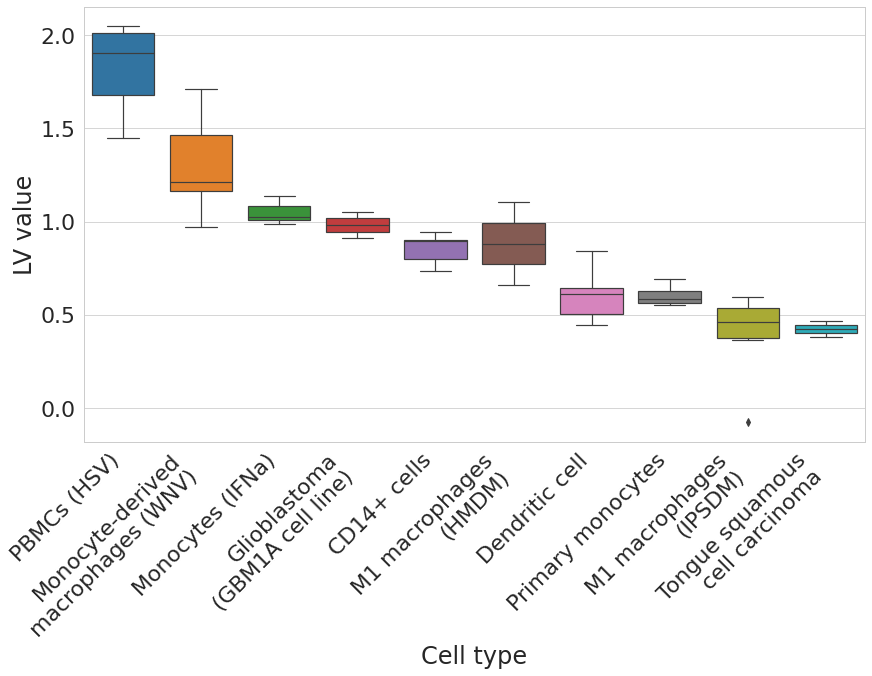

In [275]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(14, 8))
    ax = sns.boxplot(
        data=df,
        x="attr",
        y="lv",
        order=cat_order,
        linewidth=None,
        ax=ax,
    )
    ax.set_xlabel("Cell type")
    ax.set_ylabel("LV value")
    plt.xticks(rotation=45, horizontalalignment="right")

    output_dir = Path(
        "/home/miltondp/projects/labs/greenelab/phenoplier_manuscript/content/images/drug_disease_prediction/"
    )
    output_filepath = output_dir / "niacin-at-modules_cell_types.svg"
    display(output_filepath)
    plt.savefig(
        output_filepath,
        bbox_inches="tight",
    )

# Tissues

In [75]:
df = pd.concat(tissue_dfs[:N_TOP_LVS], ignore_index=True)
# df = pd.concat([_get_lv_rank(x) for x in tissue_dfs[:N_TOP_LVS]], ignore_index=True)

In [76]:
df.groupby("attr").mean().squeeze().sort_values(ascending=False).head(50)

attr
Kidney                                           0.664597
kidney                                           0.662350
Blood                                            0.613820
Kidney tubules                                   0.372490
Heparinised blood                                0.365669
bladder                                          0.351314
blood                                            0.309753
umbilical cord blood                             0.288038
Bone marrow                                      0.267101
Lung adenocarcinoma                              0.235711
placenta from full-term pregnancy                0.229173
bone marrow                                      0.222914
Whole blood                                      0.198839
Gastrointestinal Stromal Tumor                   0.176956
cord blood                                       0.165468
Tumor                                            0.148332
Leukapheresis                                    0.146331
Portal ve

# LV analysis

In [54]:
lv_obj = LVAnalysis("LV116", data)

In [56]:
lv_obj.lv_genes.head(20)

,gene_name,LV116,gene_band
0,IFIT1,6.937650,10q23.31
1,MX1,6.650584,21q22.3
2,IFIT2,6.479595,10q23.31
3,OAS3,6.311481,12q24.13
4,OASL,6.212510,12q24.31
5,IFIT3,5.990415,10q23.31
6,OAS2,5.873026,12q24.13
7,OAS1,5.701188,12q24.13
8,MX2,5.549364,21q22.3
9,RSAD2,5.244291,2p25.2


In [77]:
lv_data = lv_obj.get_experiments_data()

SRP059039, SRP045500, SRP063059, SRP045569, SRP015670, SRP059531, SRP062958, SRP039361, SRP056733, SRP060370, SRP062966, SRP045352, SRP048804, SRP032775, SRP059172, SRP050246, SRP064458, SRP033711, SRP049820, SRP023199, SRP060416, SRP005279, SRP042161, SRP059701, SRP068139, SRP051848, SRP014428, SRP063661, SRP057205, SRP041826, SRP059057, SRP064259, SRP046226, SRP044956, SRP066356, SRP048640, SRP041885, SRP045659, SRP041647, SRP045565, SRP041620, SRP053186, SRP045441, SRP022133, SRP055874, SRP029990, SRP044206, SRP065763, SRP056443, SRP041538, SRP044593, SRP019270, SRP067934, SRP059035, SRP019936, SRP054971, SRP058237, SRP051368, SRP019758, 

In [78]:
lv_data.shape

(4274, 105)

In [83]:
_tmp = lv_data[["cell type", "LV116"]].dropna()

In [85]:
_tmp[_tmp["cell type"].str.contains("M1")]

cell type     LV116
project   run                                     
SRP039361 SRR2910664   M1-polarized HMDM  0.659014
          SRR2910671  M1-polarized IPSDM  0.414396
          SRR2910670  M1-polarized IPSDM -0.073581
          SRR2939133   M1-polarized HMDM  1.104377
          SRR2939134   M1-polarized HMDM  0.881763
          SRR2939145  M1-polarized IPSDM  0.364958
          SRR2939146  M1-polarized IPSDM  0.506842
          SRR2939148  M1-polarized IPSDM  0.543771
          SRR2939147  M1-polarized IPSDM  0.597001

In [86]:
_tmp[_tmp["cell type"].str.contains("CD14")]

cell type     LV116
project   run                                                
SRP041826 SRR1282161  Primary CD14+/CD16+ monocytes  0.230883
          SRR1282162  Primary CD14+/CD16+ monocytes  0.287578
          SRR1282163  Primary CD14+/CD16+ monocytes  0.547642
          SRR1282160  Primary CD14+/CD16+ monocytes -0.096427
          SRR1282164  Primary CD14+/CD16+ monocytes  0.010500
          SRR1282166  Primary CD14+/CD16+ monocytes  0.041394
          SRR1282165  Primary CD14+/CD16+ monocytes -0.167267
          SRR1282167  Primary CD14+/CD16+ monocytes  0.170839
          SRR1282169  Primary CD14+/CD16+ monocytes -0.051987
          SRR1282168  Primary CD14+/CD16+ monocytes  0.443167
          SRR1282170  Primary CD14+/CD16+ monocytes  0.275083
          SRR1282171  Primary CD14+/CD16+ monocytes  0.351928
          SRR1282172  Primary CD14+/CD16+ monocytes  0.063096
          SRR1282173  Primary CD14+/CD16+ monocytes  0.272780
          SRR1282174  Primary CD14+/CD16+ monocytes  0.122376
          SRR1282175  Primary CD14+/CD16+ monocytes -0.083836
          SRR1282176  Primary CD14+/CD16+ monocytes -0.134923
          SRR1282177  Primary CD14+/CD16+ monocytes -0.102467
          SRR1282178  Primary CD14+/CD16+ monocytes -0.022341
          SRR1282179  Primary CD14+/CD16+ monocytes -0.099233
          SRR1282180  Primary CD14+/CD16+ monocytes -0.017653
          SRR1282182  Primary CD14+/CD16+ monocytes  0.085782
          SRR1282181  Primary CD14+/CD16+ monocytes  0.382617
          SRR1282183  Primary CD14+/CD16+ monocytes  0.245886
          SRR1282185  Primary CD14+/CD16+ monocytes -0.121478
          SRR1282184  Primary CD14+/CD16+ monocytes  0.064294
          SRR1282186  Primary CD14+/CD16+ monocytes  0.127237
          SRR1282187  Primary CD14+/CD16+ monocytes -0.016085
          SRR1282188  Primary CD14+/CD16+ monocytes  0.084159
          SRR1282189  Primary CD14+/CD16+ monocytes -0.035647
          SRR1282190  Primary CD14+/CD16+ monocytes -0.005439
          SRR1282191  Primary CD14+/CD16+ monocytes  0.018762
          SRR1282192  Primary CD14+/CD16+ monocytes  0.044972
          SRR1282194  Primary CD14+/CD16+ monocytes  0.046946
          SRR1282193  Primary CD14+/CD16+ monocytes  0.171404
          SRR1282195  Primary CD14+/CD16+ monocytes -0.121174
          SRR1282196  Primary CD14+/CD16+ monocytes -0.112898
          SRR1282197  Primary CD14+/CD16+ monocytes -0.091886
          SRR1282199  Primary CD14+/CD16+ monocytes -0.120345
          SRR1282198  Primary CD14+/CD16+ monocytes  0.050925

In [87]:
lv_obj2 = LVAnalysis("LV881", data)

In [88]:
lv_obj2.lv_genes.head(20)

,gene_name,LV881,gene_band
0,MCM7,3.976067,7q22.1
1,CDC45,3.588157,22q11.21
2,PRIM1,3.445345,12q13.3
3,MCM4,3.420215,8q11.21
4,RFC4,3.372605,3q27.3
5,RFC5,3.363940,12q24.23
6,FANCI,3.339942,15q26.1
7,PCNA,3.267518,20p12.3
8,MCM6,3.155560,2q21.3
9,MCM2,3.125547,3q21.3


In [89]:
lv_attrs = lv_obj.get_attributes_variation_score()
_tmp = pd.Series(lv_attrs.index)
lv_attrs = lv_attrs[
    _tmp.str.match(
        "(?:cell.+type$)|(?:tissue$)|(?:tissue.+type$)",
        case=False,
        flags=re.IGNORECASE,
    ).values
].sort_values(ascending=False)
display(lv_attrs)

tissue          0.097682
cell type       0.056706
cell subtype    0.035469
tissue type     0.017317
dtype: float64

SRP042161, SRP050499, SRP066834, SRP060416, SRP057196, SRP055569, SRP018525, SRP059035, SRP028301, SRP062773, SRP033135, SRP050440, SRP059379, SRP048603, SRP044917, SRP041102, SRP059775, SRP048604, SRP034711, SRP035312, SRP055101, SRP055153, SRP014428, SRP041255, SRP042286, SRP021509, SRP045570, SRP018838, SRP060370, SRP030617, SRP064457, SRP015138, SRP007461, SRP053186, SRP064259, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (34 != 35)
  warnings.warn(


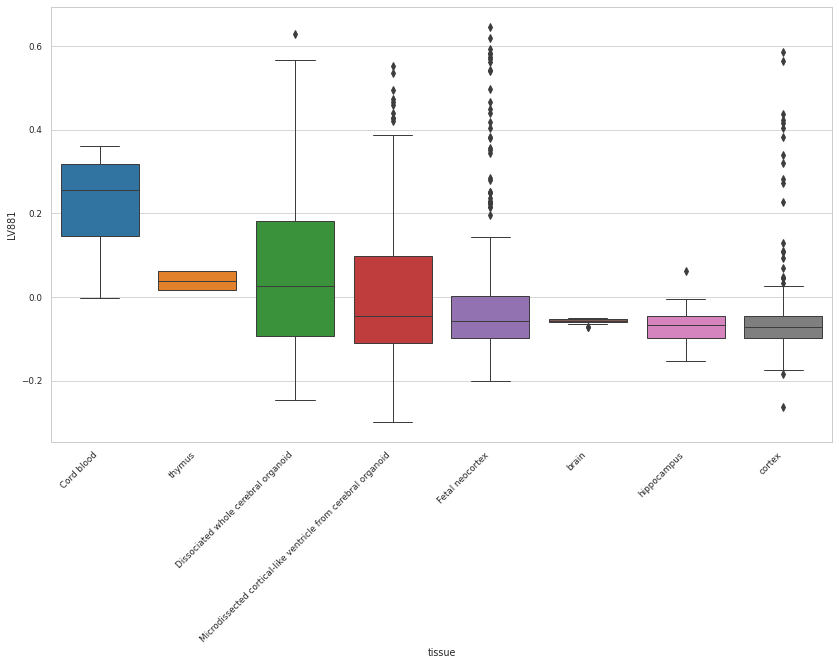

In [90]:
with sns.plotting_context("paper", font_scale=1.0), sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(14, 8))
    ax = lv_obj2.plot_attribute("tissue", top_x_values=20)

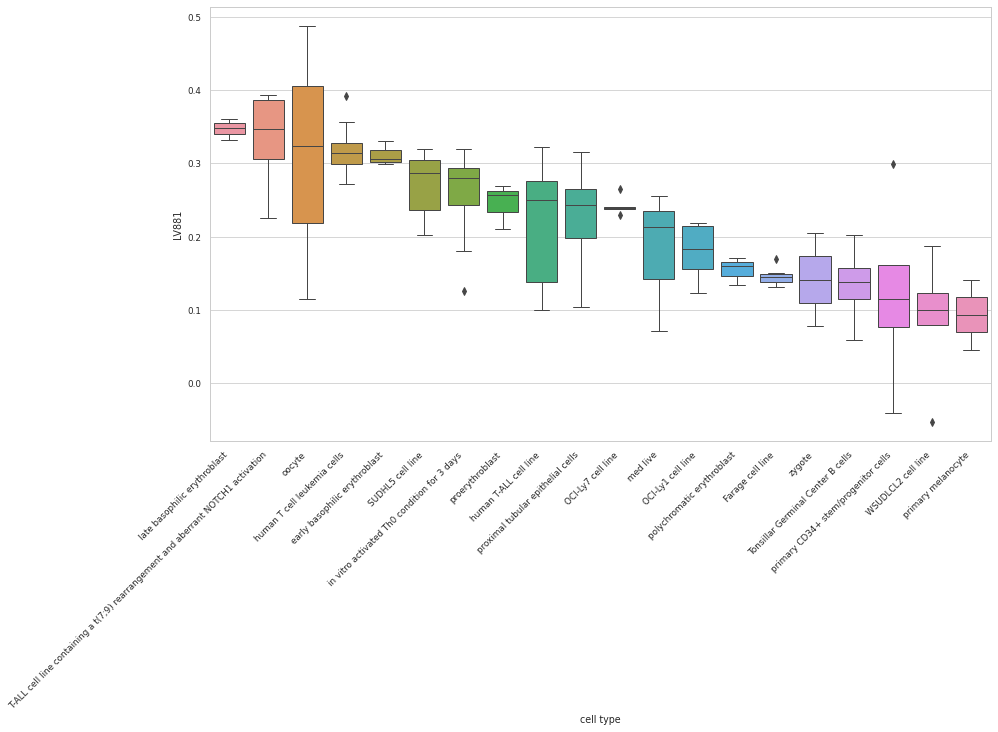

In [91]:
with sns.plotting_context("paper", font_scale=1.0), sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(14, 8))
    ax = lv_obj2.plot_attribute("cell type", top_x_values=20)